In [1]:
# Ilmeisesti on best practice importtaa kaikki aina aluksi
# Luento 1
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Luento 2
import scrapy

# Luento 3
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Luento 5
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from warnings import filterwarnings
filterwarnings('ignore')

# Luento 1

### Viikon Joda-opiskelut

Viikon luennon katsoin tallenteelta, mutta demoluennon ensimmäisen puoliskon katsoin livenä. Päiväkirjan laatimisessa käytetty materiaali tulee lähinnä luentomateriaaleista, mutta esimerkiksi Jupyterin käyttöönotossa hain apua YouTubesta: https://www.youtube.com/watch?v=DKiI6NfSIe8&t=2s. 

### Datatiede?

Datatiede on saanut paljon kritiikkiä siitä, että se on vain tilastotiedettä modernisoidulla nimellä ja datatieteilijä on vain tilastotieteilijä hienommalla titteliä. Asia ei todellisuudessa kuitenkaan ole näin: tilastollisen analyysin lisäksi datatieteilijän tulee hanskata monia muitakin aihealueita, kuten liiketoiminta, ohjelmointi, tietokannat sekä data tehokas viestintä yleisölleen esimerkiksi visualisoinnin kautta. Voidaan siis sanoa, että tilastotiede on osa datatiedettä.

CRIPS-DM malli kuvaa mielestäni hyvin datatieteilijän työnkuvaa. Aluksi lähetään siitä, että ymmärretään omaa liiketoimintaa ja dataa. Tämän jälkeen täytyy ymmärtää, että miten ne liittyvät yhteen ja millainen data on ylipäätänsä relevanttia liiketoiminnan kannalta. Tämä data täytyy sen jälkeen ”siivota” kaikesta kyseenomaisessa tapauksessa epärelevantista datasta ja mallintaa siten, että se on helppo viestiä ja helposti ymmärrettävissä. Lopuksi datan perusteella pitää osata tehdä johtopäätöksiä liiketoiminnan tukemiseksi.

### Data

Internet ja sen mukana tulleet hullutukset kuten sosiaalinen media ovat mahdollistaneet yritysten liiketoiminnan ainoastaan datan keräämiselle ja myymiselle (Netflixissä on tosi mielenkiintoinen dokkari asiaan liittyen). Yritykset kuten Facebook, keräävät käyttäjistään mahdollisimman paljon dataa ja selvittävät sen avulla, onko kyseinen henkilö esimerkiksi kiinnostunut ostamaan uusia kenkiä. Tämän jälkeen Facebook voi myydä esimerkiksi mainospaikkoja siten, että kenkävalmistajien mainokset näkyvät vain heille, joilla todennäköisesti on intressejä ostaa kengät. Esimerkiksi Google tililtäsi näkee, mitä kaikkea Google sinusta tietää. Netflix dokkaria lainaten, ”datankerääjän todennäköisesti tietävät poliittiset näkemyksesi paremmin kuin sinä itse”.

Datan käsittelyn välineiden, kuten tekoälyn kehitys on mahdollistanut myös sen, että tästä datasta voidaan helposti jalostaa tietoa. Myös laskentatehon kasvaminen ja uusien työvälineiden jatkuva keksiminen ja päivittyminen ovat olleet vauhdittamassa datatieteen kehitystä ja kasvua. 

### Demo

Edellä kerrotun teorian lisäksi opin myös datan käsittelemistä Jupyterilla ja Pythonilla. Alla olevan demo data on sama, kuin aiemmin linkkaamassa "Jupyter Notebook Tutorial"-videossa, ja se löytyy täältä: https://www.kaggle.com/ronitf/heart-disease-uci. 

In [ ]:
# Luetaan data ja tallennetaan muuttujaan df
original_df = pd.read_csv("heart.csv")

# Kopiodaan data uuteen muuttujaan, jotta ei sörkitä vanhaa
df = original_df.copy()

In [ ]:
# Tulostetaan ensimmäiset 5 riviä
df.head()

In [ ]:
# Tulostetaan datatyypit
print(df.dtypes)

In [ ]:
# Valitaan ja summataan kolesteroliarvot iän mukaan kolesteroliarvot
ages_chols = df.loc[:, ["age", "chol"]]

age_over_50 = ages_chols[ ages_chols["age"] <= 60]
age_over_50 = age_over_50[ age_over_50["age"] > 50]

age_over_60 = ages_chols[ages_chols["age"] <= 70]
age_over_60 = age_over_60[age_over_60["age"] >60]

age_over_70 = ages_chols[ ages_chols["age"] > 70 ]

chol_sum_over_50 = sum(age_over_50["chol"])
chol_sum_over_60 = sum(age_over_60["chol"])
chol_sum_over_70 = sum(age_over_70["chol"])

# Visualisoidaan data
df_plot = pd.DataFrame([[chol_sum_over_50, chol_sum_over_60, chol_sum_over_70]])
df_plot.columns = ['Age over 50', 'Age over 60', 'Age over 70']

df_plot.plot.bar(figsize=(13,8))
plt.legend(loc=2)
plt.ylabel('Cholesterol')
plt.show()

### Viisi oivaillusta tältä viikolta

1. Datatiede kattaa tilastoanalyysin lisäksi monia muita osaamisalueita
2. Dataa kerätään jatkuvasti ja paljon
3. Datan käsittelyn välineet kehittyvät huimaa vaihtua
4. Opin käyttämään Jupyteria datan käsittelyn välineenä
5. Datan mallintaminen voi mennä pienemmästäkin syntaksivirheestä pieleen

### Kehitysehdotukset

En keksi vielä tältä viikolta kehitysehdotuksia. Haluan esittää siitä kiitokset, että vanhoilla materiaaleilla pystyy suorittamaan kurssia juuri siinä aikataulussa, mikä itselle sopii. Tämä on suuri helpostus minulle aikatauluni suunnittelun suhteen.

# Luento 2

### Viikon Joda-opiskelut
Tällä viikolla katsoin sekä luennon, että demon tallenteilta. Päiväkirjan laadin luentomateriaalin avulla.

### Datatieteen prosesista
Datatieteen prosessiin kuuluu neljä päävaihetta: tiedon käsittely, analyysi, reflektio ja tulosten viestiminen vastaanottajalle soveltuvassa muodossa. Tästä proseduurista noin 80 % työpanoksesta menee ensimmäiseen vaiheeseen, mikä sisältää datan hankkimisen ja siivoamisen (80/20 -sääntö).  Data voidaan hakea esimerkiksi julkisten rajapintojen kautta, mittauslaitteiden avulla tai tuottamalla se manuaalisesti. Raakadatan perusteella ei usein voi suoraan tehdä analyysiä ja vetää siitä johtopäätöksiä, vaan se täytyy siivota ja formatoida uudestaan. Tämä johtuu siitä, että dataa tuskin on alun perin tuotettu sitä käyttötarkoitusta varten, mihin esimerkiksi tutkija sitä haluaa hyödyntää. Data saattaa usein sisältää myös virheitä (esim. perus kirjoitusvirheitä jne.), jotka saattavan kaataa tai aiheuttaa bugeja sitä käsittelevälle ohjelmistolle.

### Datatieteilijä vs datainsinööri
Yksi suurimmista eroista datatieteilijän ja datainsinöörin välillä on työprosessien eroavaisuus. ETL (Extract/Load/Transform) on tarkoitettu datainsinööreille ja DAD (Discover/Access /Distill) on datatieteilijöille. Datainsinöörin tehtävä on keskittyä datan käsittelyyn liittyviin teknisiin ratkaisuihin, kun taas datatieteilijä pyrkii luomaan datasta syvällisempää ymmärrystä ja luoda arvoa.

### Liiketoimintarelevanssi
Data-analytiikalla on kyky luoda yritykselle valmiudet suorituskyvyn parantamiseen. Tämä tapahtuu lisäämällä ymmärrystä liiketoimintaprosessisista. Data-analytiikan koostuu seuraavista teemoista:
- **Kuvaileva analytiikka**, mitä on tapahtunut?
- **Diagnosoiva analytiikka**, miksi se on tapahtunut?
- **Ennakoiva analytiikka**, mitä todennäköisesti tulee tapahtumaan?
- **Ohjaava analytiikka**, mitä asialle pitäisi tehdä?

Vaikka data-analytiikka luo edellytykset liiketoiminnan kehittämiselle, suurin osa yrityksistä ei kuitenkaan sitä ole vielä omaksunut.

### Ryömijät ja raapijat
Eräs tapa datankeruulle on ryömijöiden ja raapijoiden käyttö. Ryömijä on botti, joka on ohjelmoitu käymään systemaattisesti verkkosivuja läpi. Raapija on taas työkalu, joka kerää dataa verkkosivuilta. Käytännössä ryömijä ja raapija toimivat yhdessä siten, että raapija on ikään kuin ryömijän mukana ja kerää dataa samanaikaisesti, kun ryömijä käy verkkosivuja läpi. Ryömijöitä ja raapijoita käyttäessä tulee ottaa huomioon mahdolliset lailliset esteet, sillä niiden keräämä data ei välttämättä aina ole julkista. Tämä taas vaikuttaa siihen, kuinka kerättyä dataa saa käsitellä ja julkaista.

### Demo
Demona toteutan samanlaisen datascraperin Pythonin Scrapy-kirjastoa käyttäen. Otan tähä mallia YouTube-videosta: https://www.youtube.com/watch?v=ogPMCpcgb-E. Huomaa, että demo löytyy kokonaisuudessaan samasta repositoriosta (reddit_scraper.py).

In [ ]:
# Asennetaan Scraoy, ja generoidaan scraperin skeleton
!pip install scrapy
!scrapy genspider reddit_scraper reddit.com

In [ ]:
# Hakee Redditin langasta r/dogs kaikki .jpg-muotoiset kuvat

class RedditScraperSpider(scrapy.Spider):
    name = 'reddit_scraper'
    allowed_domains = ['reddit.com']
    start_urls = ['https://www.reddit.com/r/dogs/']

    def parse(self, response):
        links = response.xpath("//img/@src")
        html = ""

        for link in links:
            url = link.get()

            if any(extension in url for extension in [".jpg"]):
                html += """<a href="{url}" target="_blank"><img src="{url}" height="25%" width="25%"/><a/>""".format(url=url)

                with open("dogs.html", "a") as page:
                    page.write(html)
                    page.close()


In [ ]:
# Ajetaan scripti syöttämällä seuraava käsky komentoriville
!scrapy runspider reddit_scraper.py

### Viisi oivaillusta tältä viikolta

1. 80/20 -sääntö: datan keräämiseen ja siivoamiseen menee usein kauemmin, kuin sen analysoimiseen
2. Datainsinööri hoitaa datankäsittelyn teknisen toteutuksen ja datatieteilijä luo sillä arvoa
3. Data-analytiikan neljä teemaa
4. Ryömijän ja raapijan yhteistoiminta
5. Ryömijän ja raapijan toteuttaminen Pythonin Scrapy-kirjastolla

### Kehitysehdotukset

En keksi vieläkään kehitysehdotuksia. Kurssi on ollut erittäin hyvin järjestetty (tähän mennessä), ja mielestäni monet kurssinvetäjät esim. tietotekniikan puolelta voisivat ottaa tästä mallia.

# Luento 3

### Viikon Joda-opiskelut
Tällä viikolla koostin oppimispäiväkirjani materiaalit vuoden 2020 Joda-totetuksen avulla. Myös YouTube-videot https://www.youtube.com/watch?v=z-EtmaFJieY sekä https://www.youtube.com/watch?v=HcqpanDadyQ toimivat viikolla oppimateriaaleina.

### Koneoppiminen
Kun ensimmäisen kerran kuulin sanat ”tekoäly” ja ”koneoppiminen”, mieleeni tulivat ensimmäisenä Terminator ja Ex Machina elokuvat, sekä ajatus siitä, että ne ovat vielä kaukana tulevaisuudessa. Asia ei kuitenkaan ole näin: me olemme käytännössä kokoa ajan tekoälyn ja koneoppimisen kanssa. Esimerkiksi Instagramissa mainokset, ehdotetut julkaisut ja ehdotetut käyttäjätilit, joita voisin olla kiinnostunut ovat kaikki asioita, josta tietokone on datan perusteella päätellyt minun olevan kiinnostunut.  Myös esimerkiksi Googlen hakukone osaa korjata kirjoitusvirheesi, koska sen on todennäköisesti tietää, mitä yritit kirjoittaa.

Koneoppiminen on kaikessa yksinkertaisuudessaan tekoälyn osa-alue, joka ideana on opettaa tietokone tekemään ennusteita tai päätöksiä. Mitä enemmän dataa tietokoneelle syötetään, sitä paremmin tietokone oppii ja sitä parempia päätöksiä/ennusteita se tekee.

### Esimerkki
Otetaan yksinkertainen esimerkki: opetetaan kone päättämään, onko kyseessä saksanpaimenkoira vai susi. Ihminen osaisi tehdä päätöksen pelkästään katsomalla kahta eri eläintä, mutta tietokone pyrkii ikään kuin ”purkamaan” sen saaman tiedon **piirteisiin**. Näitä piirteitä voivat tässä esimerkissä olla eläimen paino, ja pituus. Tämän jälkeen koneelle voidaan antaa harjoitteludataa:

| Paino | Pituus | Eläin |
| --- | --- | --- |
| 42 | 121 | Susi |
| 26 | 79 | Koira |
| 37 | 90 | Koira |
| ... | ... | ... |
| 58 | 134 | Susi |

Ja tämä perusteella kone oppii luomaan rajat päätöksenteolle alla olevan kuvan mukaisesti:

![title](img/kuvaaja.jpeg)

Kuten huomataan, osa koirista menee susirajan sisäpuolelle ja osa susista jää taas koirarajan sisälle. Harjoitusdatan perusteella tietokone ei välttämättä pysty piirtämään kovin tarkkaa rajaa koirien ja susien välille, vaan se tekee datan perusteella rajan siten, että mahdollisimman vähän susia jää koirarajan sisälle ja toisinpäin. Mitä enemmän dataa tietokone saa, sitä tarkemman rajan se osaa piirtää ja sitä päätöksiä se oppii tekemään. 

### Demo
Tämä demo on käytännössä kopioitu luento/demosessiomateriaaleista. Yritän omin sanoin kuitenkin selittää, mitä missäkin tapahtuu.

In [ ]:
# Asennetaan tarvittavat kirjastot, importit tehty muistion alussa
!pip install sklearn
!pip install numpy

In [ ]:
# Ladataan data
original_df = pd.read_csv("credit_train.csv")
df = original_df.copy()
df.head()

In [ ]:
"""
Data täytyy ensi siivota, ennen kuin sitä voi käsitellä.
Tämä funktio siivoaa datan (esim. poistaa NaN-rivit) ja muokaa datan
meidän käyttötarkoitukseen sopivaan muotoon
"""

def siivoaData(data, slice=1.0):

    poistettavatMuuttujat = ['Loan ID','Customer ID']
    data = data.drop(poistettavatMuuttujat, axis=1)

    sarakkeet =['Current Loan Amount','Credit Score','Annual Income','Years of Credit History',
            'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
           'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
    muuttujanTäyttäjä = Imputer()
    data[sarakkeet] = muuttujanTäyttäjä.fit_transform(data[sarakkeet])
    data[sarakkeet] = data[sarakkeet].astype(int)

    data=data.dropna()

    if slice > 0 and slice < 1:
        mid_point = int(len(data)*slice)
        data = data.loc[:mid_point]

    y = data['Loan Status']
    new_y = []
    for i in y:
        if i == 'Fully Paid':
            new_y.append(1)
        else:
            new_y.append(0)
    data = data.drop('Loan Status', axis=1)

    data = pd.get_dummies(data)
    dataMean = np.mean(data, axis=0)
    dataDev = np.std(data, axis=0)
    norm_x = (data - dataMean) / dataDev

    x = data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normMinMax = pd.DataFrame(x_scaled)

    return norm_x, normMinMax, data, new_y, dataMean, dataDev

In [ ]:
# Tämä funtio jaksaa datan opetus- ja testidataksi
def opetusTestiJako(xMinMax, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=33)
    return x_train, x_test, y_train, y_test

In [ ]:
# Siivotan data
x, xMinMax, xNoNorm, y, xMean, xDev = siivoaData(df)

# Jaetaan se opetus- ja testidataksi
_train, x_test, y_train, y_test = opetusTestiJako(x,y)
xMinMax_train, xMinMax_test, y_train, y_test = opetusTestiJako(xMinMax,y)
xNoNorm_train, xNoNorm_test, y_train, y_test = opetusTestiJako(xNoNorm,y)

# Luodaan datan avulla malli
clf = SGDClassifier()
clf.fit(xNoNorm_train, y_train)

# Lasketaan harjoitteludatan tarkuus-arvo
y_train_pred = clf.predict(xNoNorm_train)
print("Harjoitteludatan tarkuus-arvo")
print (metrics.accuracy_score(y_train, y_train_pred))

# Lasketaan testidatan tarkuus-arvo
y_pred = clf.predict(xNoNorm_test)
print("Restidatan tarkuus-arvo")
print (metrics.accuracy_score(y_test, y_pred))

# Näytettään luokitteluraportti
print("Luokitteluraportti")
print (metrics.classification_report(y_test, y_pred))

### Viisi oivaillusta tältä viikolta
1. Kuinka koneoppiminen teoriassa tapahtuu
2. Koneoppimisella on eri meneltemiä
3. Mitä enemmän dataa koneelle syöttää, sitä paremmin se oppii
4. Koneoppisen tekeminen käytännössä Pyhtonillla
5. Datan siivoamisen oleellisuusden huomaaminen

# Luento 4

### Datatieteen projektimalli
Kurssin harjoitustyössä käytön prosessimallinen CRISP-DM:ää. Tässä mallista korostuu vahvasti se, että projektia ei tehdä vain huvin ja urheilun vuoksi, vaan datatiedeprojektin tulisi lähtökohtaisesti tuoda organisaatiolle lisäarvoa **ratkaisemalla jokin liiketoimintaongelma**.  Jotta tällainen ratkaisu voidaan löytää, tulee ensin ymmärtää oma liiketoiminta, miten jokin siihen liittyvä asia (esimerkiksi tuote) paranee, kun siihen lisätään datakomponentti.
Toinen harjoitustyössä käytettävä prosessimalli on mahdollisuuskehikko, jossa on seuraavat vaiheet:
1. **Ongelma.** Tunnista ja kuvaa, minkä ongelman haluat ratkaista
2. **Kuka käyttää ratkaisua?** Eli ketä/ketkä ongelman ratkaisemisesta hyötyy
3. **Kuvaa, miten ongelma on ratkaistu tänään.** Onko ratkaisu esimerkiksi kierretty jotenkin?
4. **Miten tarjottu ratkaisu vaikuttaa liiketoimintaan?** Tai miten ratkaisematta jättäminen vaikuttaa?
5. **Miten ratkaisua käytetään?** Eli mitä hyötyjä käyttäjän saavat ratkaisusta
6. **Ratkaisun käytön ja hyödyn mittaaminen**
7. **Teknologian hyväksyntä**, joka saadaan koetun hyödyn (subjektiivinen, ei välttämättä objektiivinen hyöty) ja helppokäyttöisyyden avulla
8. **Liiketoimintaan saadun vaikutuksen mittaaminen**
9. **Budjetti**

Harjoitustyössä keskitytään vaiheisiin 1–4. 
Datatieteen projektille on tyypillistä, että siinä vaiheessa, kun prosessi on käyty läpi, niin siitä herää vielä lisää ongelmia ja niiden datatieteellisiä ratkaisumahdollisuuksia. Datatieteen työt ovat siis yhtä jatkuvaa iteraatiota.


### Demo
Demoan datan hakemista Inside AirBnB:stä.

In [ ]:
# Haetaan Excel-tiedosto sivulta
LISTINGSFILE = 'http://data.insideairbnb.com/germany/be/berlin/2020-03-17/data/listings.csv.gz'

# Valitaan sarakkeet hinta ja makuuhuone
cols = ['price', 'bedrooms']

# Luetaan dataframeen
df = pd.read_csv(LISTINGSFILE, usecols=cols, compression='infer')
number_of_results = len(df.index)

print("Datasta löytyi " + str(number_of_results) + " osumaa.")

### Viisi oivaillusta tältä viikolta
1. Datatieteen projekteissa fokus on liiketoimintarelevanssissa, eikä itse datassa
2. CRIPS-DM on hyvä prosessimalli datatieteen projekteille
3. Mahdollisuuskehikon vaiheet
4. Datan hakuu löytyy paljon rajapintoja
5. Datan hakeminen käytännössä 

### Kehitysehdotukset
YouTubesta löytyy aika paljon tutoriaaleja datatieteen projekteihin, esim. Twitterin rajanpinnan käyttö. Näistä voisi poimia muutamia esimerkkejä, joista voisi ottaa mallia omaan harjoitustyöhön halutessaan. Näistä esimerkeistä voisi esim. kertoa, mikä niissä on tehty hyvin ja mikä voitaisiin tehdä paremmin. Tällöin saataisiin enemmän konkreettisia esimerkkejä, joita voisi katselle ns. lisämateriaalina. Tällaiset esimerkit ovat mielestäni erityisin hyviä heille, keillä on vähän kokemusta koodaamisesta ja rajapinnoista.

# Luento 5
### Viikon Joda-opiskelut
Tämän viikon kurssimateriaaleista kävin läpi vain Jupyter työkirjat. Apunani olivat Wikipedia: https://en.wikipedia.org/wiki/Natural_language_processing & https://fi.wikipedia.org/wiki/P%C3%A4%C3%A4komponenttianalyysi ja YouTube: https://www.youtube.com/watch?v=X2vAabgKiuM.
### NLP
NLP eli natural language processing on kieli- ja tietojenkäsittelytieteiden sekä tekoälyn osa, joka koskee tietokoneiden ja ihmisen kielen välistä interaktiota, erityisesti sitä, miten tietokoneet prosessoivat suurta määrä luonnollista lingvististä dataa.  Tämän seurauksena tietokone pystyy ymmärtämään esimerkiksi puhuttua ja kirjoitettua kieltä, sekä generoimaan itse kieltä. Yleisiä NLP:n sovelluksia ovat esimerkiksi chatbotit ja Google kääntäjä.

### PCA
PCA eli principle component analysis (pääkomponenttianalyysi) on tekniikan, joka avulla voidaan redusoida esimerkiksi neliulotteisen datan dimensio. Tämän tavoitteena on löytää monidimensioisesta datasta komponentti, joilla datan keskisimmät piirteet voidaan esittää ilman informaatiohukkaa.

### DEMO
Demoan PCA:ta demoluennon esimerkin mukaisesti.

In [10]:
original_df = pd.read_csv("heart.csv")
df = original_df.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Datan normalisaatio

xMean = np.mean(df, axis=0)
xDev = np.std(df, axis=0)
xNorm = (df - xMean) / xDev

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xMinMax = pd.DataFrame(x_scaled)

In [5]:
# Ajetaan PCA kahdella komponentilla.
pca = PCA(n_components=2)

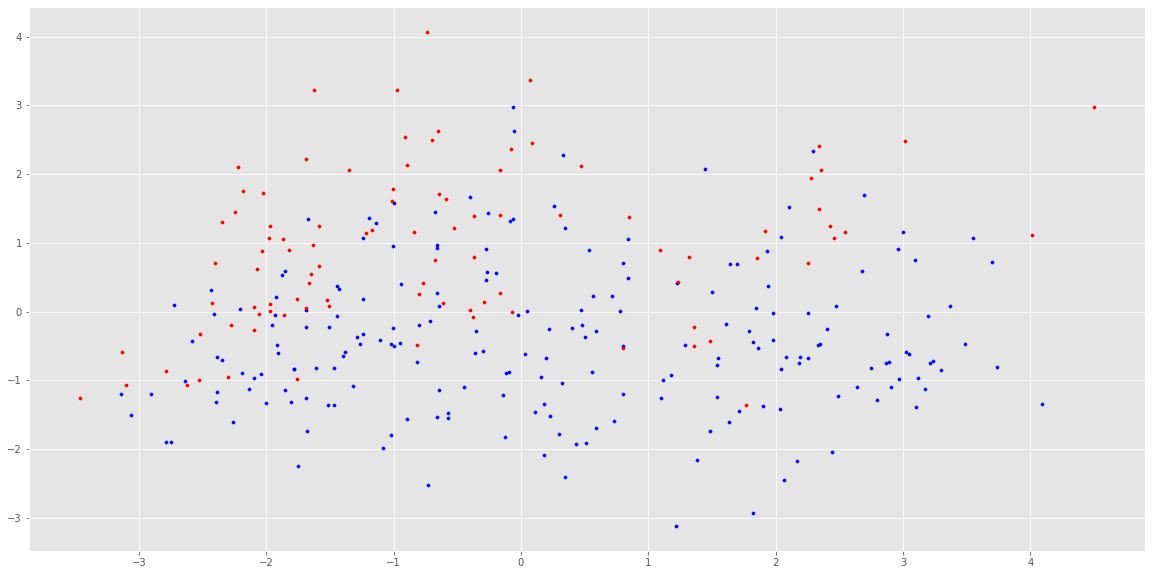

In [11]:
# Visualisoidaan L2-normalisoitu data
reducedX = pca.fit_transform(xNorm)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in df["sex"]]
for dp, c in zip(reducedX[:1000], colors[:1000]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

### Viikon viisi oivallusta
1. NLP, ja sen sovelluskohteet
2. NLP käytännössä
3. Tokenisaatio NLP:ssä
4. PCA, ja sen sovelluskohteet
5. PCA käytännössä
